<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52560 entries, 0 to 52559
Data columns (total 5 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Date(YYYY-MM-DD hh:mm:ss)              52560 non-null  object 
 1   100m wind speed (m/s)                  52560 non-null  float64
 2    rated power output at 100m (MW)       52560 non-null  float64
 3    SCORE-lite power output at 100m (MW)  52560 non-null  float64
 4   CorrectedScore                         52560 non-null  float64
dtypes: float64(4), object(1)
memory usage: 2.0+ MB
Prediction Errors:
n	Error
1	29.38485658797838
2	26.70323533342689
3	26.633432250360382
4	26.63338291796282
5	26.59128356047939
6	26.57583234979256
7	26.575821391222217
8	26.566494243544994
9	26.559506954733198
10	26.55948967287198
11	26.555493525595402
12	26.53440551829368
13	26.53409057957119
14	26.528875792578997
15	26.52519053627559
16	26.518728996685486
17	

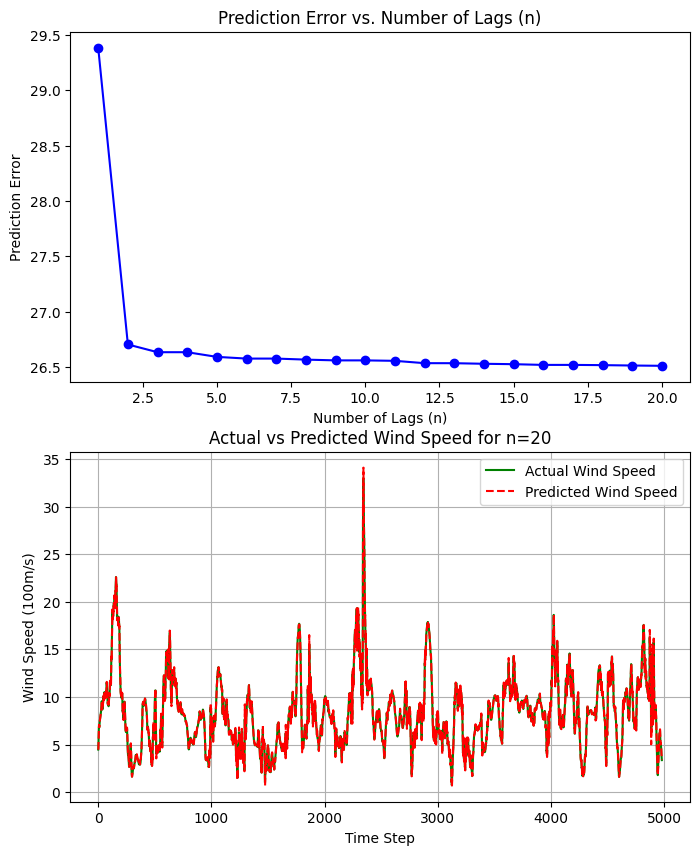

In [13]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


wind_data_path = './winddata.csv'
wind_data = pd.read_csv(wind_data_path)

wind_data_info = wind_data.info()
wind_data_head = wind_data.head()

def create_ar_dataset(data, n_lags=1):
    X, y = [], []
    for i in range(20, len(data)):
        X.append(data[i-n_lags:i])
        y.append(data[i])
    return np.array(X), np.array(y)


wind_speed_data = np.array(wind_data['100m wind speed (m/s)'])[:5000]

ar_models = {}
prediction_errors = {}

for n in range(1, 21):  # n = 1 to n = 20
    X, y = create_ar_dataset(wind_speed_data, n_lags=n)
    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)
    error = np.linalg.norm(y - y_pred)
    
    ar_models[n] = model
    prediction_errors[n] = error

min_n = min(prediction_errors, key=prediction_errors.get)
min_error = prediction_errors[min_n]

n_values = list(prediction_errors.keys())
errors = list(prediction_errors.values())

print("Prediction Errors:")
print("n\tError")
for n, error in prediction_errors.items():
    print(f"{n}\t{error}")

print(f"Minimum Prediction: \nn = {min_n}, Error = {min_error}")

# Plot the prediction errors vs. number of lags
plt.figure(figsize=(8, 10))
plt.subplot(2, 1, 1)
plt.plot(n_values, errors, marker='o', linestyle='-', color='blue')
plt.title('Prediction Error vs. Number of Lags (n)')
plt.xlabel('Number of Lags (n)')
plt.ylabel('Prediction Error')

n_chosen = min_n
X_chosen, y_actual = create_ar_dataset(wind_speed_data, n_lags=n_chosen)
y_predicted = ar_models[n_chosen].predict(X_chosen)

# Plot the actual vs predicted wind speed for the chosen n
plt.subplot(2, 1, 2)
plt.plot(y_actual, label='Actual Wind Speed', color='green')
plt.plot(y_predicted, label='Predicted Wind Speed', linestyle='--', color='red')
plt.title(f'Actual vs Predicted Wind Speed for n={n_chosen}')
plt.xlabel('Time Step')
plt.ylabel('Wind Speed (100m/s)')
plt.legend()
plt.grid(True)
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52560 entries, 0 to 52559
Data columns (total 5 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Date(YYYY-MM-DD hh:mm:ss)              52560 non-null  object 
 1   100m wind speed (m/s)                  52560 non-null  float64
 2    rated power output at 100m (MW)       52560 non-null  float64
 3    SCORE-lite power output at 100m (MW)  52560 non-null  float64
 4   CorrectedScore                         52560 non-null  float64
dtypes: float64(4), object(1)
memory usage: 2.0+ MB
Prediction Errors:
n	Mean Error
1	0.005880907700856866
2	0.005344320488728153
3	0.005331464595421153
4	0.005332523566204107
5	0.005325204997804264
6	0.005323192122187749
7	0.005324239112796645
8	0.0053234504256847275
9	0.005323088341033838
10	0.005324142102898867
11	0.0053244001179837954
12	0.00532122305082449
13	0.005322020181034285
14	0.00532130021927534
15	0.

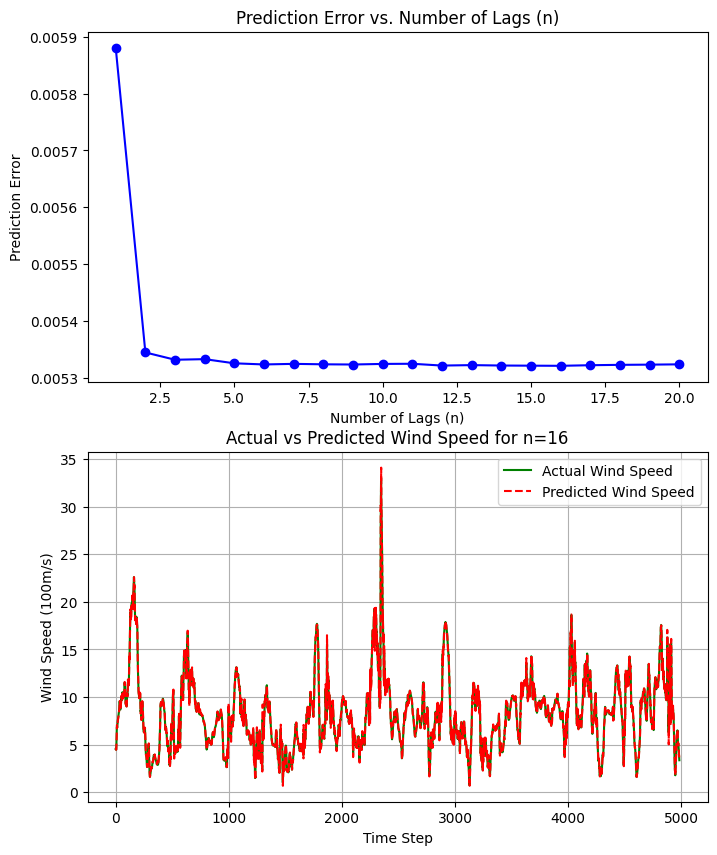

In [7]:
# Use y from the data lag + 1 to 5000.
# In this situation, we can't use the total error, making this method not meet the problem's need to some extent.
# But we can still use the mean error to approximately choose the n.

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


wind_data_path = './winddata.csv'
wind_data = pd.read_csv(wind_data_path)

wind_data_info = wind_data.info()
wind_data_head = wind_data.head()

def create_ar_dataset(data, n_lags=1):
    """
    Create the dataset for the AR model with the specified number of lags.
    :param data: The time series data.
    :param n_lags: The number of lag terms to use.
    :return: A tuple of (X, y) where X is the matrix of lagged values and y is the target variable.
    """
    X, y = [], []
    for i in range(n_lags, len(data)):
        X.append(data[i-n_lags:i])
        y.append(data[i])
    return np.array(X), np.array(y)


wind_speed_data = wind_data['100m wind speed (m/s)'][:5000]

ar_models = {}
prediction_errors = {}

for n in range(1, 21):  # n = 1 to n = 20
    X, y = create_ar_dataset(wind_speed_data, n_lags=n)
    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)
    error = np.linalg.norm(y - y_pred)

    ar_models[n] = model
    prediction_errors[n] = error / len(y)  # Normalize the error by the number of samples

min_n = min(prediction_errors, key=prediction_errors.get)
min_error = prediction_errors[min_n]

n_values = list(prediction_errors.keys())
errors = list(prediction_errors.values())

print("Prediction Errors:")
print("n\tMean Error")
for n, error in prediction_errors.items():
    print(f"{n}\t{error}")

print(f"Minimum Prediction: \nn = {min_n}, Mean Error = {min_error}")

# Plot the prediction errors vs. number of lags
plt.figure(figsize=(8, 10))
plt.subplot(2, 1, 1)
plt.plot(n_values, errors, marker='o', linestyle='-', color='blue')
plt.title('Prediction Error vs. Number of Lags (n)')
plt.xlabel('Number of Lags (n)')
plt.ylabel('Prediction Error')

n_chosen = min_n
X_chosen, y_actual = create_ar_dataset(wind_speed_data, n_lags=n_chosen)
y_predicted = ar_models[n_chosen].predict(X_chosen)

# Plot the actual vs predicted wind speed for the chosen n
plt.subplot(2, 1, 2)
plt.plot(y_actual, label='Actual Wind Speed', color='green')
plt.plot(y_predicted, label='Predicted Wind Speed', linestyle='--', color='red')
plt.title(f'Actual vs Predicted Wind Speed for n={n_chosen}')
plt.xlabel('Time Step')
plt.ylabel('Wind Speed (100m/s)')
plt.legend()
plt.grid(True)
plt.show()
